<a href="https://colab.research.google.com/github/amirgros/46211-Deep-Learning-Project/blob/main/Diffusion%20based/Diffusion_Based_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffusion Based Image colorizer

Prompt based, 2 implementions with ControlNet and MiDaS.\
Results are much less good then CNN based solutions in git, check them out as well.

In [ ]:
!pip install -q diffusers transformers accelerate safetensors opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 117.0 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os

In [ ]:
input_filename = "Albert_Einstein_Head.jpg"

img = Image.open(input_filename).convert("L").resize((512, 512))
img_rgb = Image.fromarray(np.stack([np.array(img)]*3, axis=-1))  # convert grayscale to 3-channel

gray_path = "grayscale_rgb_input.png"
img_rgb.save(gray_path)

In [ ]:
from diffusers import ControlNetModel

# Depth-aware ControlNet for real image colorization
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11f1p_sd15_depth",
    torch_dtype=torch.float32
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/945 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [ ]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float32
).to("cuda")



model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
output = pipe(
    prompt="a realistic, high-quality color photograph from gray scale image",
    image=img_rgb,
    num_inference_steps=30,
    guidance_scale=9,
    controlnet_conditioning_scale=1.2
)

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
colorized = output.images[0]
output_path = "colorized_output.png"
colorized.save(output_path)

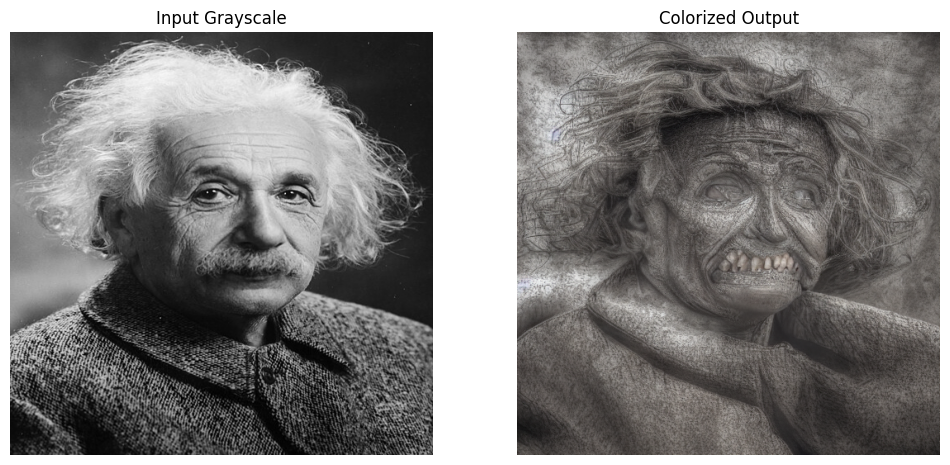

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Input Grayscale")
axs[0].axis('off')

axs[1].imshow(colorized)
axs[1].set_title("Colorized Output")
axs[1].axis('off')
plt.show()

In [ ]:
import torch
import cv2
import torchvision.transforms as T
import urllib.request
from PIL import Image
import numpy as np

# Load MiDaS model
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
midas.to("cuda" if torch.cuda.is_available() else "cpu").eval()

transform = torch.hub.load("intel-isl/MiDaS", "transforms").small_transform


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.l

Loading weights:  None


Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_small_256.pt" to /root/.cache/torch/hub/checkpoints/midas_v21_small_256.pt
100%|██████████| 81.8M/81.8M [00:00<00:00, 314MB/s]
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
from torchvision.transforms import Compose, Resize, ToTensor

input_image = Image.open("Albert_Einstein_Head.jpg").convert("RGB").resize((512, 512))

transform = Compose([
    Resize(256),
    ToTensor()
])

img_tensor = transform(input_image).unsqueeze(0).to("cuda" if torch.cuda.is_available() else "cpu")

# MiDaS model
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
midas.to("cuda" if torch.cuda.is_available() else "cpu").eval()

# Depth prediction
with torch.no_grad():
    prediction = midas(img_tensor)
    depth = prediction.squeeze().cpu().numpy()

# Normalize and save depth map
depth_min, depth_max = depth.min(), depth.max()
depth = (255 * (depth - depth_min) / (depth_max - depth_min)).astype("uint8")
depth_rgb = np.stack([depth]*3, axis=-1)
depth_pil = Image.fromarray(depth_rgb)
depth_pil.save("depth_map_input.png")


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


In [ ]:
output = pipe(
    prompt="a realistic, high-quality color photograph",
    image=depth_pil,
    num_inference_steps=50,
    guidance_scale=9.0,
    controlnet_conditioning_scale=1.2
)


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [ ]:
colorized = output.images[0]
output_path = "colorized_output.png"
colorized.save(output_path)

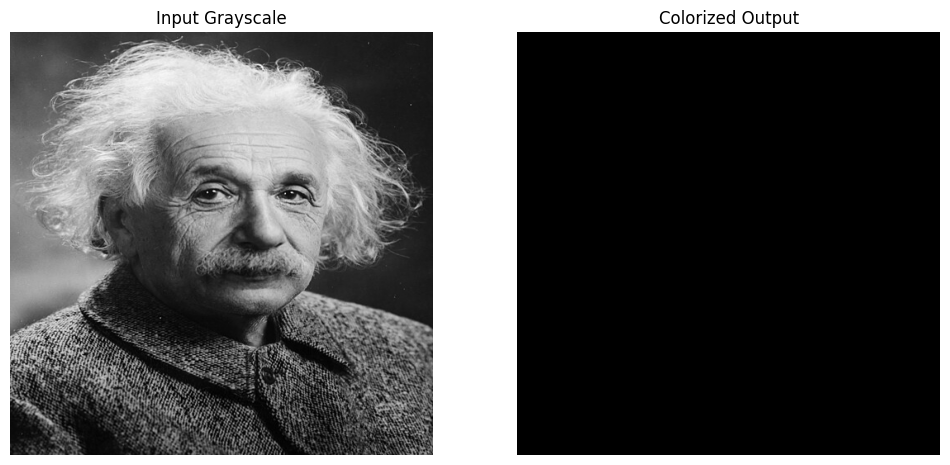

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Input Grayscale")
axs[0].axis('off')

axs[1].imshow(colorized)
axs[1].set_title("Colorized Output")
axs[1].axis('off')
plt.show()

In [ ]:
from torchvision.transforms import Resize, ToTensor, Compose
import torch
import numpy as np
from PIL import Image

input_image = Image.open("Albert_Einstein_Head.jpg").convert("RGB")
input_image_resized = input_image.resize((384, 384))

midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
midas.to("cuda" if torch.cuda.is_available() else "cpu").eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

img = transform(input_image_resized)
img = img.to("cuda" if torch.cuda.is_available() else "cpu")

# Predict depth
with torch.no_grad():
    prediction = midas(img.unsqueeze(0))
    depth = prediction.squeeze().cpu().numpy()

# Normalize and convert to RGB for ControlNet
depth_min, depth_max = depth.min(), depth.max()
depth_normalized = (255 * (depth - depth_min) / (depth_max - depth_min)).astype("uint8")
depth_rgb = np.stack([depth_normalized]*3, axis=-1)
depth_pil = Image.fromarray(depth_rgb).resize((512, 512))
depth_pil.save("depth_map_input.png")


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
